<a href="https://colab.research.google.com/github/MatheusMullerGit/dio-desafio-pandas/blob/main/DIO_Resolucao_Desafio_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Resolução do Desafio de Análise de dados com Python e Pandas da **Digital Innovation One** ministrada pela Professora **Fernanda Santos**
*Nesta versão implementei a instalação e importação da biblioteca yfinance para trabalhar com os dados financeiros oriundos desta API não oficial, visto que a API original do Yahoo! Finance foi descontinuada.*

In [1]:
#Instalando a biblioteca yfinance (executar na primeira execução)
!pip install yfinance --upgrade --no-cache-dir

In [2]:
#Importando as bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# Selecionando o ativo da Microsoft
msft = yf.Ticker("MSFT")

# Obtendo os dados históricos da Microsoft
df = msft.history(period="max")

In [4]:
#Visualizando as 5 primeiras linhas
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0


In [5]:
#Inserindo o campo Date no Dataframe e resetando o índice
df.insert(0,"Date",df.index)
df.reset_index(drop=True, inplace=True)

In [6]:
#Visualizando as 5 primeiras linhas
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0
1,1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0
2,1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0
3,1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0
4,1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0


In [7]:
#Quantidade de linhas e colunas
df.shape

(8955, 8)

In [8]:
#Verificando os tipos de dados
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [9]:
#Qual o valor médio da ação da empresa (considerando o valor de fechamento)?
df["Close"].mean()

32.44229684390589

In [10]:
#Qual o retorno financeiro (variação percentual diária de preço em relação ao dia anterior)?
df["Retorno"] = df["Close"].pct_change() #Criando a coluna de retorno financeiro

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Retorno
0,1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0,NaN
1,1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0,0.035712
2,1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0,0.017250
3,1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0,-0.025432
4,1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0,-0.017390


In [12]:
#Qual o retorno financeiro acumulado Total?
df["Retorno_acum"] = np.cumprod(df["Retorno"][1:] + 1)-1

print("Retorno acumulado do ativo no período: ", df["Retorno_acum"].iloc[-1]*100, "%")

Retorno acumulado do ativo no período:  479322.33576018823 %


In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Retorno,Retorno_acum
0,1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0,NaN,NaN
1,1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0,0.035712,0.035712
2,1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0,0.017250,0.053578
3,1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0,-0.025432,0.026784
4,1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0,-0.017390,0.008928


 **Missing Values**

In [14]:
#Verificando se temos dados faltantes
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Retorno         1
Retorno_acum    1
dtype: int64

In [15]:
#Excluindo o primeiro registro, contendo valor nulo nas colunas calculadas
df.dropna(inplace=True)

In [16]:
#Verificando se temos dados faltantes
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Retorno         0
Retorno_acum    0
dtype: int64

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Retorno,Retorno_acum
1,1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0,0.035712,0.035712
2,1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0,0.017250,0.053578
3,1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0,-0.025432,0.026784
4,1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0,-0.017390,0.008928
5,1986-03-20,0.062040,0.062040,0.059844,0.060393,58435200,0.0,0.0,-0.026547,-0.017857


**E, se a gente quiser saber o Crescimento acumulado agrupado por Ano?**

In [18]:
#Vamos Agrupar por ano
df.groupby([df["Date"].dt.year])["Retorno_acum"].last()

Date
1986       0.723220
1987       2.875006
1988       2.803582
1989       5.214301
1990       9.750019
1991      22.839331
1992      26.442015
1993      24.915224
1994      38.294721
1995      55.410830
1996     105.232329
1997     165.178935
1998     355.625726
1999     599.429885
2000     222.071793
2001     339.714907
2002     264.886141
2003     283.010254
2004     308.935026
2005     306.027010
2006     354.658321
2007     428.787775
2008     238.023835
2009     382.554784
2010     357.529177
2011     341.339160
2012     361.191066
2013     521.634230
2014     665.696520
2015     816.982338
2016     940.315456
2017    1323.719148
2018    1599.198228
2019    2520.242035
2020    3592.628982
2021    4793.223358
Name: Retorno_acum, dtype: float64

In [19]:
 pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
#Selecionando os dados a partir de 1990
df2 = df[df["Date"].dt.year >= 1990]

In [21]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Retorno,Retorno_acum
962,1990-01-02,0.38,0.39,0.38,0.39,53035200,0.00,0.00,0.02,5.34
963,1990-01-03,0.39,0.40,0.39,0.39,113774400,0.00,0.00,0.01,5.38
964,1990-01-04,0.39,0.40,0.39,0.40,125740800,0.00,0.00,0.03,5.56
965,1990-01-05,0.40,0.40,0.39,0.39,69566400,0.00,0.00,-0.02,5.40
966,1990-01-08,0.39,0.40,0.39,0.40,58982400,0.00,0.00,0.02,5.50


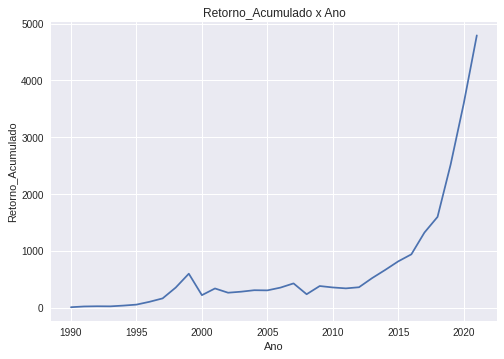

In [22]:
df2.groupby(df2["Date"].dt.year)["Retorno_acum"].last().plot(title="Retorno_Acumulado x Ano")
plt.xlabel("Ano")
plt.ylabel("Retorno_Acumulado");

In [23]:
df["Retorno"].describe()

count               8,954.00
mean                    0.00
std                     0.02
min                    -0.30
25%                    -0.01
50%                     0.00
75%                     0.01
max                     0.20
Name: Retorno, dtype: float64

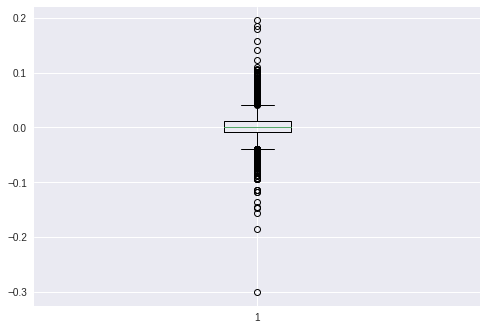

In [24]:
#Gráfico de Boxplot
plt.boxplot(df["Retorno"]);

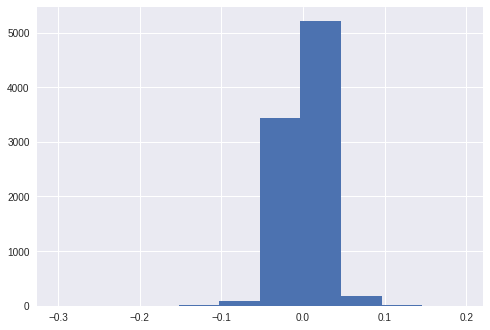

In [25]:
#Histograma
plt.hist(df["Retorno"]);

In [26]:
#Retorno mínimo
df["Retorno"].min()

-0.3011589367886194

In [27]:
#Retorno máximo
df['Retorno'].max()

0.19565189267736316

In [28]:
#Identificando os Outliers mais críticos (Variação maior que 15% em relação ao dia anterior)
df[(df["Retorno"] < -0.15) | (df["Retorno"] > 0.15)]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Retorno,Retorno_acum
405,1987-10-19,0.27,0.28,0.20,0.20,146880000,0.00,0.00,-0.30,2.23
407,1987-10-21,0.23,0.27,0.22,0.25,262080000,0.00,0.00,0.18,3.04
410,1987-10-26,0.20,0.21,0.16,0.17,148320000,0.00,0.00,-0.19,1.80
413,1987-10-29,0.18,0.21,0.18,0.21,167040000,0.00,0.00,0.16,2.41
3567,2000-04-24,21.27,21.50,20.56,21.07,313645800,0.00,0.00,-0.16,341.64
3692,2000-10-19,18.48,19.67,18.34,19.57,256993200,0.00,0.00,0.20,317.21
5697,2008-10-13,17.17,19.15,16.99,19.15,144935400,0.00,0.00,0.19,310.42


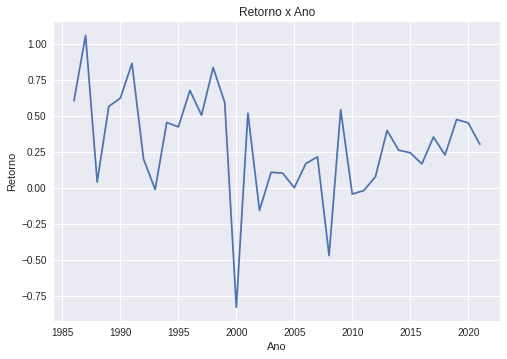

In [29]:
df.groupby(df["Date"].dt.year)["Retorno"].sum().plot(title="Retorno x Ano")
plt.xlabel("Ano")
plt.ylabel("Retorno");

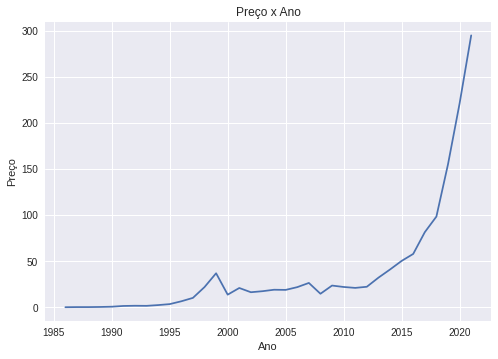

In [30]:
df.groupby(df["Date"].dt.year)["Close"].last().plot(title="Preço x Ano")
plt.xlabel("Ano")
plt.ylabel("Preço");

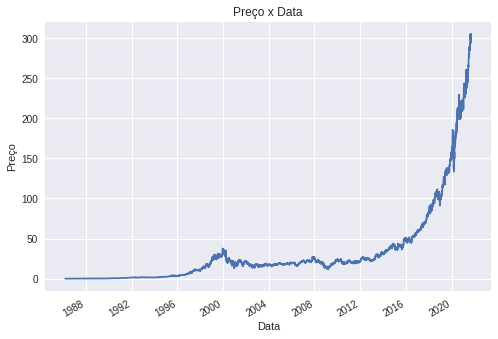

In [31]:
df.groupby(df["Date"])["Close"].last().plot(title="Preço x Data")
plt.xlabel("Data")
plt.ylabel("Preço");

In [32]:
df.to_csv("Market_Price_Microsoft.csv", index=False)